# Data Analysis on Exercise 1

## load data set

the newest version of the dataset  is used [NEW ArtVis dataset delimited with semicolons](https://tuwel.tuwien.ac.at/mod/resource/view.php?id=2457815)

In [49]:
import polars as pl
from datetime import datetime

artvis_df = pl.read_csv(source='data/artvis_dump_NEW-semicolon.csv',has_header=True, separator=';',null_values=['\\N'])
artvis_df = artvis_df.with_columns(
    pl.col('a.birthdate').replace("01/01/1900","1900-01-01")
)
artvis_df = artvis_df.with_columns(
    pl.col('a.birthdate').str.to_date('%Y-%m-%d',strict=True)
)
artvis_df = artvis_df.with_columns(
    pl.col('a.deathdate').str.to_date('%Y-%m-%d',strict=True)
)
#artvis_df.head(10)

In [56]:
artvis_df

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",489,"""Second Post-Impressionist Exhi…","""Grafton Galleries""",1912,"""group""",4,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",618,"""Exhibition of the Camden Town …","""Public Art Galleries""",1913,"""group""",6,"""GB""","""Brighton""",50.833333,-0.15
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",720,"""The Second Exhibition of Works…","""Goupil Gallery""",1915,"""group""",4,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",729,"""Third Exhibition of Works by M…","""Goupil Gallery""",1915,"""group""",5,"""GB""","""London""",51.514248,-0.093145
1,"""William Bernard""","""Adeney""","""M""",1878-01-01,1966-01-01,"""London""","""London""","""GB""",650,"""The First Exhibition of Works …","""Goupil Gallery""",1914,"""group""",5,"""GB""","""London""",51.514248,-0.093145
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
13998,"""Adam Emory""","""Albright""","""M""",1862-01-01,1957-01-01,"""Monroe""","""Warrenville""","""US""",224,"""Thirteenth Annual Exhibition""","""Carnegie Institute""",1909,"""group""",1,"""US""","""Pittsburgh""",40.4333,-79.9833
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,666,"""Erste Ausstellung der Freien S…","""Ausstellungshaus am Kurfürsten…",1914,"""group""",1,"""DE""","""Berlin""",52.516667,13.4
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,547,"""Frühjahr-Ausstellung der Münch…","""Königliches Kunstausstellungsg…",1913,"""group""",1,"""DE""","""Munich""",48.15,11.583333


In [66]:
artvis_df.filter(pl.col('a.birthdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",602,"""Постоянная Выставка Современна…","""Художественное Бюро Добычиной""",1913,"""group""",1,"""RU""","""Saint Petersburg""",59.8833,30.25
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",732,"""Последняя футуристическая выст…","""Художественное Бюро Добычиной""",1916,"""group""",4,"""RU""","""Saint Petersburg""",59.8833,30.25
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",543,"""Внепартийное общество художник…","""Dom Saltykova""",1913,"""group""",17,"""RU""","""Saint Petersburg""",59.8833,30.25
471,"""Fritz""","""Herzog""","""M""",0000-01-01,0000-01-01,null,null,null,3,"""2. Deutsche Künstlerbund Ausst…","""Ausstellungshaus am Kurfürsten…",1905,"""group""",2,"""DE""","""Berlin""",52.516667,13.4
471,"""Fritz""","""Herzog""","""M""",0000-01-01,0000-01-01,null,null,null,3,"""2. Deutsche Künstlerbund Ausst…","""Deutscher Künstlerbund""",1905,"""group""",2,"""DE""","""-""",51.5,10.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
13972,"""J. A.""","""Addicks""",null,0000-01-01,0000-01-01,null,null,null,1397,"""Tentoonstelling van Teekeninge…","""Arti et Amicitiae""",1909,"""group""",1,"""NL""","""Amsterdam""",52.35,4.916667
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,666,"""Erste Ausstellung der Freien S…","""Ausstellungshaus am Kurfürsten…",1914,"""group""",1,"""DE""","""Berlin""",52.516667,13.4
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,547,"""Frühjahr-Ausstellung der Münch…","""Königliches Kunstausstellungsg…",1913,"""group""",1,"""DE""","""Munich""",48.15,11.583333


In [3]:
print(pl.DataFrame(zip(artvis_df.columns,artvis_df.dtypes)).to_pandas().to_latex())

\begin{tabular}{lll}
\toprule
 & column_0 & column_1 \\
\midrule
0 & a.id & Int64 \\
1 & a.firstname & String \\
2 & a.lastname & String \\
3 & a.gender & String \\
4 & a.birthdate & String \\
5 & a.deathdate & String \\
6 & a.birthplace & String \\
7 & a.deathplace & String \\
8 & a.nationality & String \\
9 & e.id & Int64 \\
10 & e.title & String \\
11 & e.venue & String \\
12 & e.startdate & Int64 \\
13 & e.type & String \\
14 & e.paintings & Int64 \\
15 & e.country & String \\
16 & e.city & String \\
17 & e.latitude & Float64 \\
18 & e.longitude & Float64 \\
\bottomrule
\end{tabular}



In [62]:
artvis_df.filter(pl.col('a.deathdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,date,date,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",602,"""Постоянная Выставка Современна…","""Художественное Бюро Добычиной""",1913,"""group""",1,"""RU""","""Saint Petersburg""",59.8833,30.25
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",732,"""Последняя футуристическая выст…","""Художественное Бюро Добычиной""",1916,"""group""",4,"""RU""","""Saint Petersburg""",59.8833,30.25
112,"""Anna Michajlovna""","""Kirillova""","""F""",0000-01-01,0000-01-01,null,null,"""RU""",543,"""Внепартийное общество художник…","""Dom Saltykova""",1913,"""group""",17,"""RU""","""Saint Petersburg""",59.8833,30.25
471,"""Fritz""","""Herzog""","""M""",0000-01-01,0000-01-01,null,null,null,3,"""2. Deutsche Künstlerbund Ausst…","""Ausstellungshaus am Kurfürsten…",1905,"""group""",2,"""DE""","""Berlin""",52.516667,13.4
471,"""Fritz""","""Herzog""","""M""",0000-01-01,0000-01-01,null,null,null,3,"""2. Deutsche Künstlerbund Ausst…","""Deutscher Künstlerbund""",1905,"""group""",2,"""DE""","""-""",51.5,10.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
13972,"""J. A.""","""Addicks""",null,0000-01-01,0000-01-01,null,null,null,1397,"""Tentoonstelling van Teekeninge…","""Arti et Amicitiae""",1909,"""group""",1,"""NL""","""Amsterdam""",52.35,4.916667
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,666,"""Erste Ausstellung der Freien S…","""Ausstellungshaus am Kurfürsten…",1914,"""group""",1,"""DE""","""Berlin""",52.516667,13.4
13999,"""Anna""","""Davidson""","""F""",0000-01-01,0000-01-01,null,null,null,547,"""Frühjahr-Ausstellung der Münch…","""Königliches Kunstausstellungsg…",1913,"""group""",1,"""DE""","""Munich""",48.15,11.583333


extract column names of artists and exhibitions

In [63]:
artist_columns = [e for e in artvis_df.columns if e.startswith('a.')]
exhibition_columns = [e for e in artvis_df.columns if e.startswith('e.')]

create 2 separate dataframes for artists and exhibitions 

In [64]:
artists_df = artvis_df.select(artist_columns).unique()
exhibitions_df = artvis_df.select(exhibition_columns).unique()

descriptive statistic on artists

In [67]:
artists_df.filter(pl.col('a.birthdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,date,date,str,str,str
11669,"""R.""","""Götz""",null,0000-01-01,0000-01-01,null,null,null
10352,"""Theodora""","""Casadavant""","""F""",0000-01-01,0000-01-01,null,null,null
11014,"""H.""","""Oakley""",null,0000-01-01,0000-01-01,null,null,null
11089,"""Claire""","""Sachsse""","""F""",0000-01-01,0000-01-01,null,null,null
12595,"""Giovanni Maria""","""Mucchi""","""M""",0000-01-01,0000-01-01,null,null,null
…,…,…,…,…,…,…,…,…
8526,"""Nora""","""Fidler""","""F""",0000-01-01,0000-01-01,null,null,"""GB"""
6265,"""Lotten""","""Rônngvist""","""F""",0000-01-01,0000-01-01,null,null,null
13218,"""Winifred L.""","""Rynd""","""F""",0000-01-01,0000-01-01,null,null,null


In [68]:
artists_df.filter(pl.col('a.deathdate').dt.year() == 0)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,date,date,str,str,str
11669,"""R.""","""Götz""",null,0000-01-01,0000-01-01,null,null,null
10352,"""Theodora""","""Casadavant""","""F""",0000-01-01,0000-01-01,null,null,null
893,"""Bruno""","""Mewes""","""M""",1886-01-01,0000-01-01,null,null,null
11014,"""H.""","""Oakley""",null,0000-01-01,0000-01-01,null,null,null
11089,"""Claire""","""Sachsse""","""F""",0000-01-01,0000-01-01,null,null,null
…,…,…,…,…,…,…,…,…
6265,"""Lotten""","""Rônngvist""","""F""",0000-01-01,0000-01-01,null,null,null
13218,"""Winifred L.""","""Rynd""","""F""",0000-01-01,0000-01-01,null,null,null
9120,"""Marguerite""","""Robyns""","""F""",1868-01-01,0000-01-01,"""Waremme""","""Houx""","""BE"""


In [65]:
artists_df.describe()

PanicException: failed to construct datetime.date: PyErr { type: <class 'ValueError'>, value: ValueError('year 0 is out of range'), traceback: None }

In [22]:
artists_df.select('a.id').select(pl.len())

len
u32
13267


In [6]:
exhibitions_df.describe()

statistic,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
str,f64,str,str,f64,str,f64,str,str,f64,f64
"""count""",9193.0,"""9193""","""9193""",9193.0,"""9193""",9193.0,"""9187""","""9180""",9180.0,9180.0
"""null_count""",0.0,"""0""","""0""",0.0,"""0""",0.0,"""6""","""13""",13.0,13.0
"""mean""",654.481888,null,null,1910.040792,null,12.951267,null,null,50.23345,11.019508
"""std""",430.524435,null,null,2.814154,null,24.162022,null,null,3.67528,15.814008
"""min""",3.0,"""1-ая Футуристическая Выставка …","""Akademischer Verband für Liter…",1902.0,"""auction""",1.0,"""AT""","""-""",35.75,-122.4167
"""25%""",280.0,null,null,1908.0,null,3.0,null,null,48.2167,4.333333
"""50%""",588.0,null,null,1910.0,null,7.0,null,null,50.1,13.4
"""75%""",1050.0,null,null,1912.0,null,13.0,null,null,52.35,16.3667
"""max""",1487.0,"""Художественная выставка „Мир И…","""Художественный салон 11""",1916.0,"""solo""",760.0,"""US""","""Zurich""",59.9333,139.5


In [24]:
exhibitions_df.select('e.id').select(pl.len())

len
u32
9193


## Artits

plots on artists

### Nationalities

<Axes: xlabel='a.nationality', ylabel='len'>

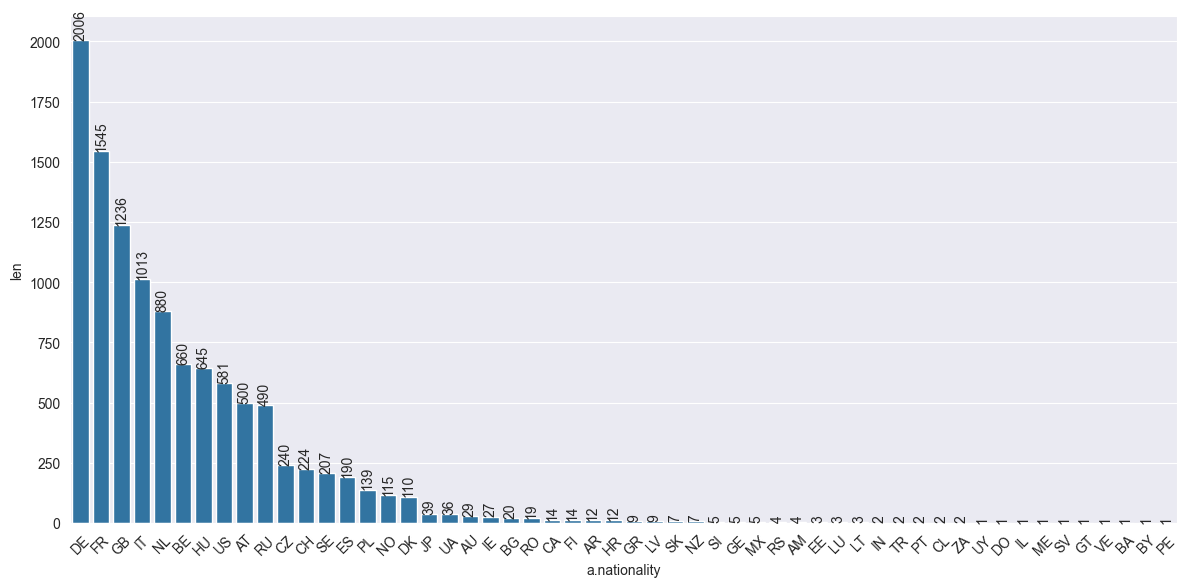

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

artvis_national = artists_df.group_by('a.nationality').len().sort('len', descending=True)
plt.figure(figsize=(12,6))
plot = sns.barplot(data=artvis_national, x='a.nationality', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0], rotation=90)
plt.tight_layout()
plot


### Gender

<Axes: xlabel='a.gender', ylabel='percent'>

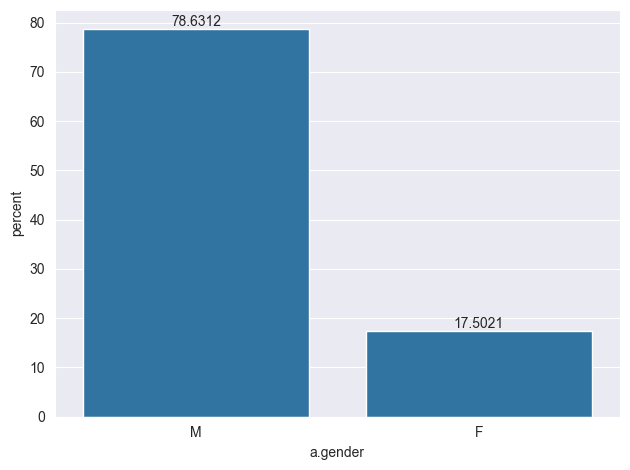

In [72]:
import seaborn as sns
from matplotlib import pyplot as plt

plot = sns.countplot(data=artists_df, x='a.gender', stat='percent')
plot.bar_label(plot.containers[0])
plt.tight_layout()
plt.savefig('data/gender.png')
plot

In [9]:
artvis_df.select('a.id','a.nationality').group_by('a.id','a.nationality').len().group_by('a.nationality').len().sort('len',descending=True)

a.nationality,len
str,u32
null,2180
"""DE""",2006
"""FR""",1545
"""GB""",1236
"""IT""",1013
…,…
"""UY""",1
"""SV""",1
"""BY""",1


## Exhibitions

plots on exhibitions

### Country

<Axes: xlabel='e.country', ylabel='len'>

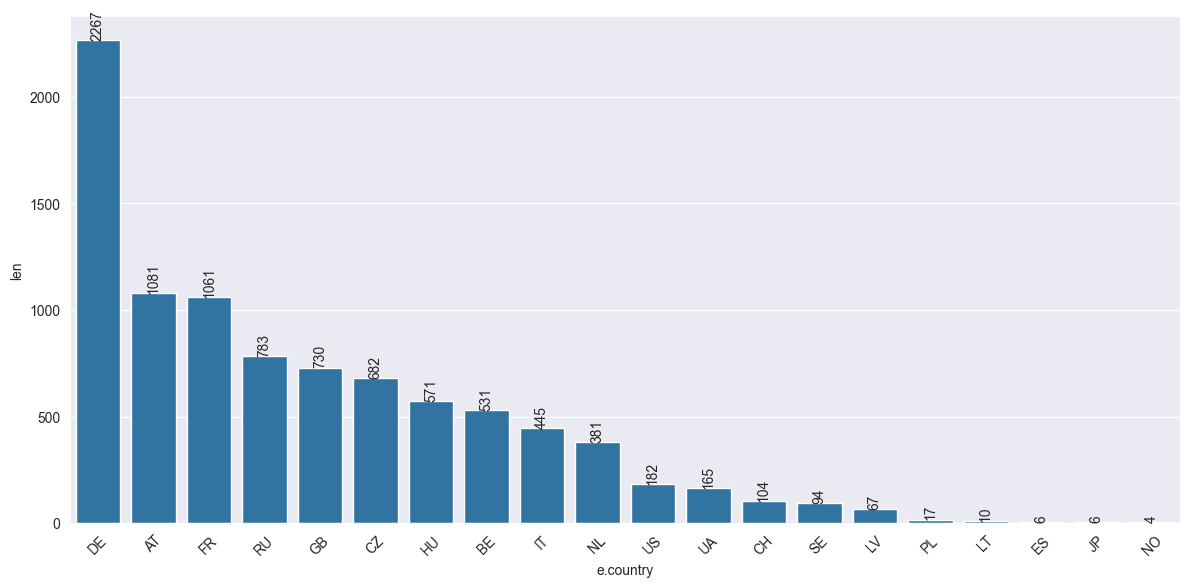

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.country').len().sort('len', descending=True), x='e.country', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0], rotation=90)
plt.tight_layout()
plt.savefig('data/exhibition_countrys.png')
plot

### Type of Exhibition

<Axes: xlabel='e.type', ylabel='len'>

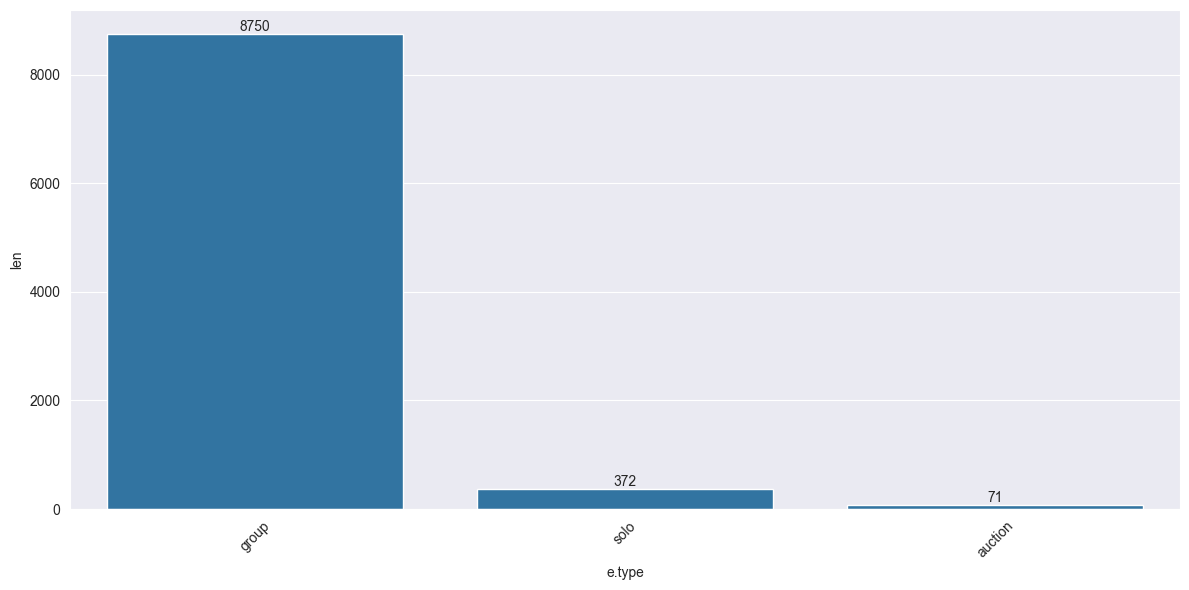

In [74]:
plt.figure(figsize=(12,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.type').len().sort('len', descending=True), x='e.type', y='len', )
plt.setp(plot.get_xticklabels(), rotation=45)
plot.bar_label(plot.containers[0] )
plt.tight_layout()
plt.savefig('data/exhibition_types.png')
plot

### City

<Axes: xlabel='e.city', ylabel='len'>

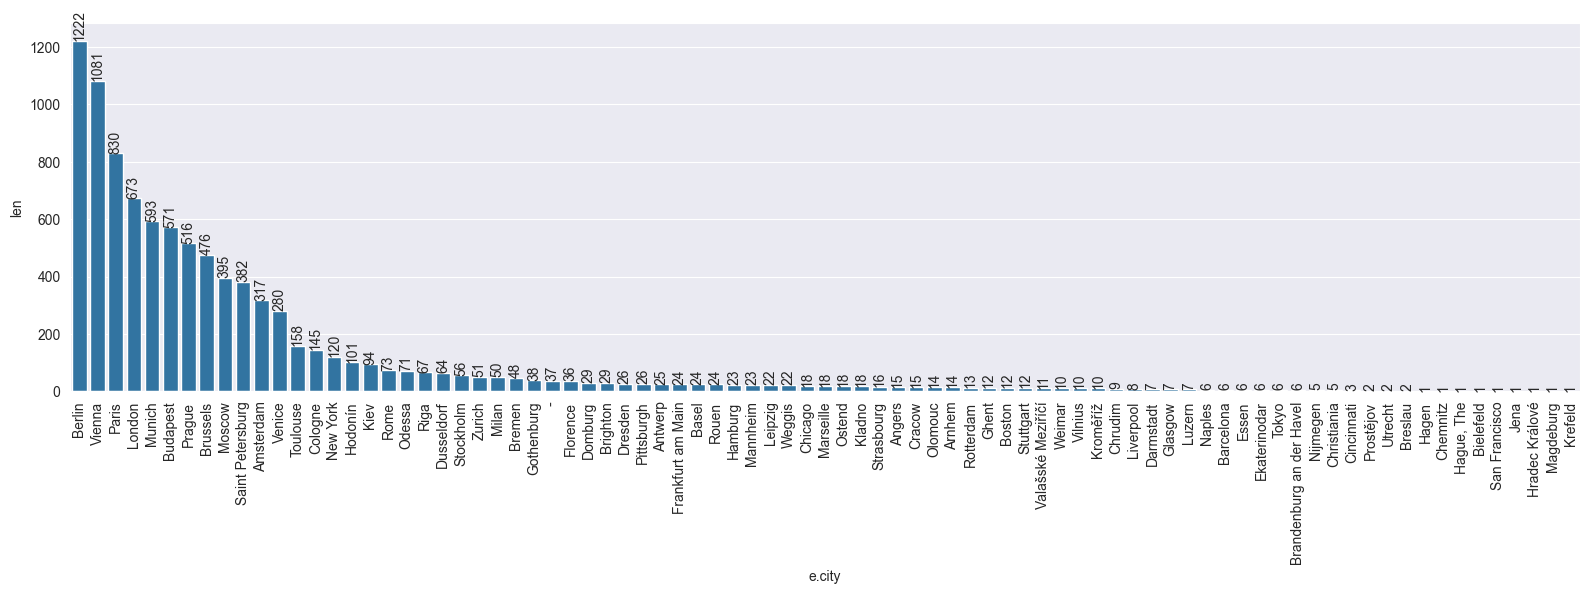

In [75]:
plt.figure(figsize=(16,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.city').len().sort('len', descending=True), x='e.city', y='len')
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0], rotation=90 )
plt.tight_layout()
plt.savefig('data/exhibition_cities.png')
plot

### Startdate

<Axes: xlabel='e.startdate', ylabel='len'>

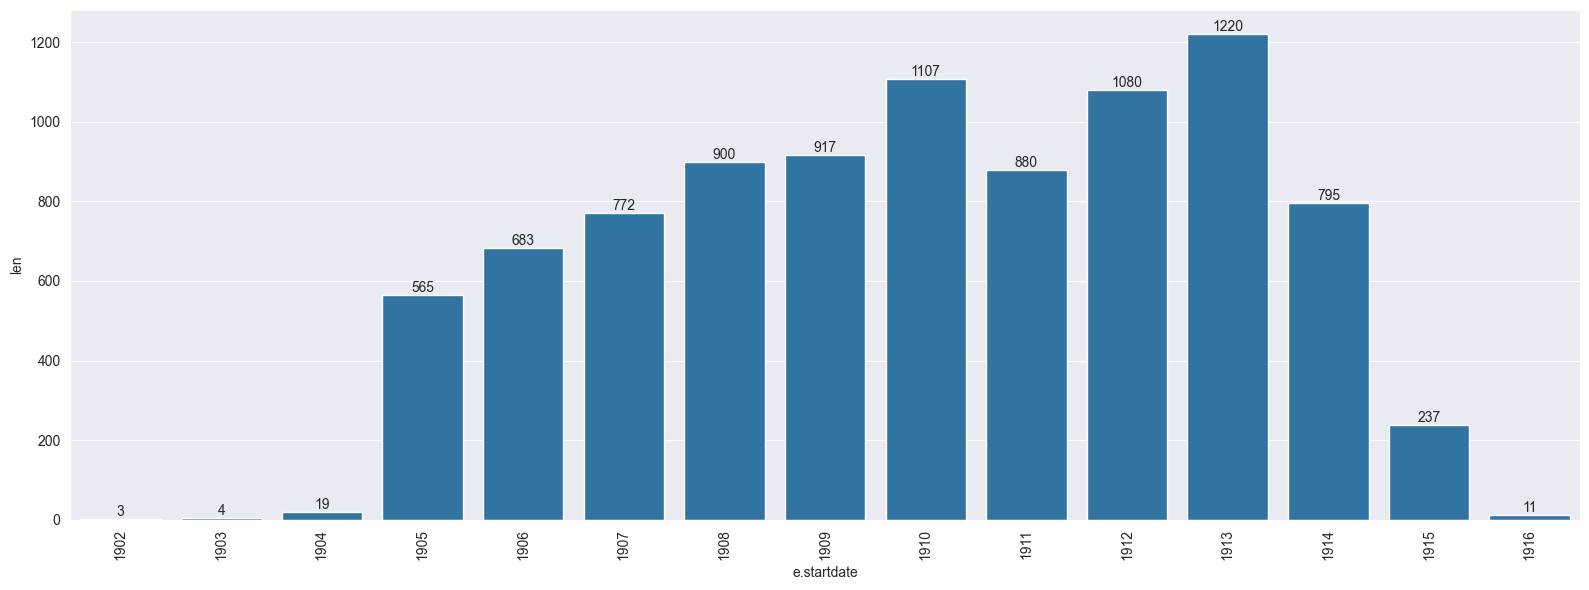

In [76]:
plt.figure(figsize=(16,6))
plot = sns.barplot(data=exhibitions_df.group_by('e.startdate').len().sort('len', descending=True), x='e.startdate', y='len')
plt.setp(plot.get_xticklabels(), rotation=90)
plot.bar_label(plot.containers[0] )
plt.tight_layout()
plt.savefig('data/exhibition_startdates.png')
plot

In [21]:
artvis_df.filter(pl.col('e.type')=='auction')

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
i64,str,str,str,str,str,str,str,str,i64,str,str,i64,str,i64,str,str,f64,f64
5,"""Vassily""","""Kandinsky""","""M""","""1866-01-01""","""1944-01-01""","""Moscow""","""Neuilly-sur-Seine""","""RU""",1095,"""Vente Aux Enchères Publiques D…","""Hôtel Drouot""",1906,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
30,"""Émile""","""Bernard""","""M""","""1868-01-01""","""1941-01-01""","""Lille""","""Paris""","""FR""",1131,"""Tableaux Modernes. Aquarelles,…","""Hôtel Drouot""",1908,"""auction""",2,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""","""1867-01-01""","""1947-01-01""","""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1249,"""Collection de M. Albert Bernie…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""","""1867-01-01""","""1947-01-01""","""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1271,"""Vente au bénéfice du Monument …","""Hôtel Drouot""",1911,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
37,"""Pierre""","""Bonnard""","""M""","""1867-01-01""","""1947-01-01""","""Fontenay-aux-Roses""","""Le Cannet""","""FR""",1131,"""Tableaux Modernes. Aquarelles,…","""Hôtel Drouot""",1908,"""auction""",5,"""FR""","""Paris""",48.866667,2.333333
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
10649,"""Hendrik Martensz.""","""Sorgh""","""M""","""1609-01-01""","""1670-01-01""","""Rotterdam""","""Rotterdam""","""NL""",1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
10650,"""Pieter van der""","""Werff""","""M""","""1665-01-01""","""1722-01-01""","""Kralingen""","""Kralingen""","""NL""",1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",1,"""FR""","""Paris""",48.866667,2.333333
10651,"""École de""","""Pourbus""",null,"""0000-01-01""","""0000-01-01""",null,null,null,1256,"""Collection Jean Dolent. Tablea…","""Hôtel Drouot""",1910,"""auction""",2,"""FR""","""Paris""",48.866667,2.333333


In [31]:
artvis_df.filter(pl.col('e.type')=='auction',pl.col('e.id')==1266).select('a.lastname','a.firstname','e.paintings').unique().sort('a.lastname','a.firstname')

a.lastname,a.firstname,e.paintings
str,str,i64
"""André""","""Albert""",1
"""Bonnard""","""Pierre""",19
"""Cézanne""","""Paul""",1
"""Daumier""","""Honoré""",1
"""Delacroix""","""Eugène""",1
…,…,…
"""Roussel""","""Ker-Xavier""",7
"""Seurat""","""Georges""",1
"""Vallotton""","""Félix""",1


In [19]:
artvis_df.filter(pl.col('e.type')=='auction').select('a.lastname').unique()

a.lastname
str
"""Lewisohn"""
"""Cassatt"""
"""Torrent"""
"""Kollwitz"""
"""Castelucho Diana"""
…
"""Does"""
"""Albertin"""
"""Auglay"""


In [17]:
artists_df.head(5)

a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality
i64,str,str,str,str,str,str,str,str
6419,"""Paul""","""Bouvier""","""M""","""1857-01-01""","""1940-01-01""","""Neuchatel""","""Neuchatel""","""CH"""
7996,"""Leon""","""Houyoux""","""M""","""1856-01-01""","""1940-01-01""","""Brussels""","""Auderghem""","""BE"""
12993,"""Francesco Della""","""Volta""","""M""","""0000-01-01""","""0000-01-01""",null,null,null
1435,"""Hans""","""Hofmann""","""M""","""1880-01-01""","""1966-01-01""","""Weissenburg in Bayern""","""New York""","""US"""
2073,"""Dmitry""","""Mitrokhin""","""M""","""1883-01-01""","""1973-01-01""","""Yeysk""","""Moscow""","""RU"""


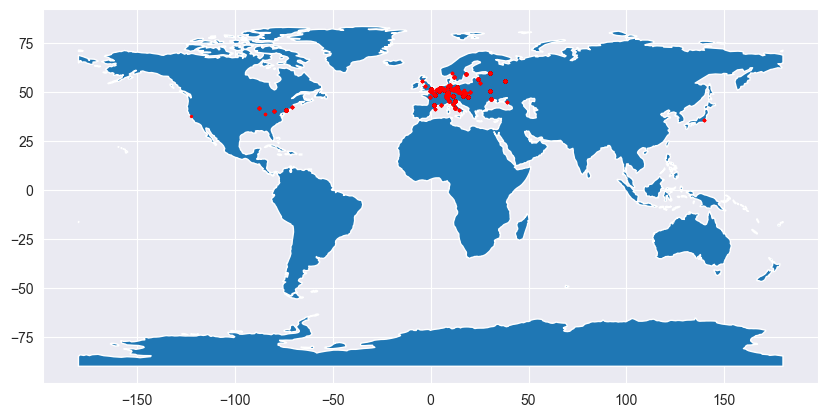

In [14]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

geo_exhibitions_df = exhibitions_df.select('e.longitude','e.latitude').drop_nulls()

geometry = [Point(xy) for xy in zip(geo_exhibitions_df['e.longitude'], geo_exhibitions_df['e.latitude'])]
gdf = GeoDataFrame(geo_exhibitions_df, geometry=geometry)   

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=2);